<a href="https://colab.research.google.com/github/devi777/Heart-Disease-Classification/blob/master/HD_Prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-processing Data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv('heart.csv')

In [0]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [0]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


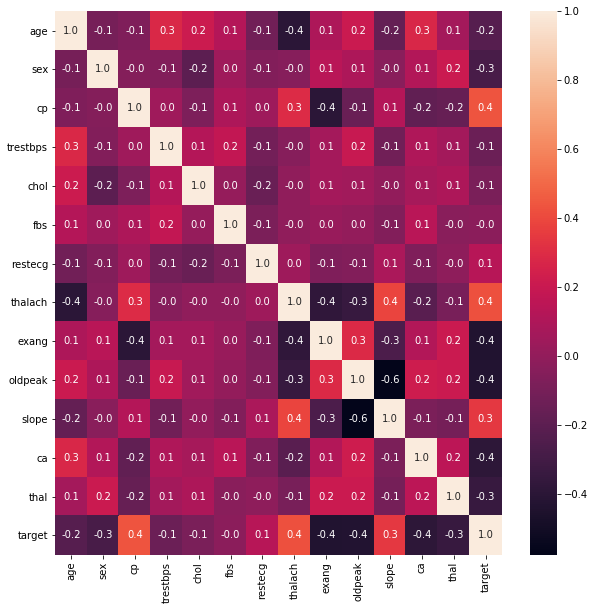

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

# Graphical Editing
Let's edit the graph and learn about it's parameters as well.

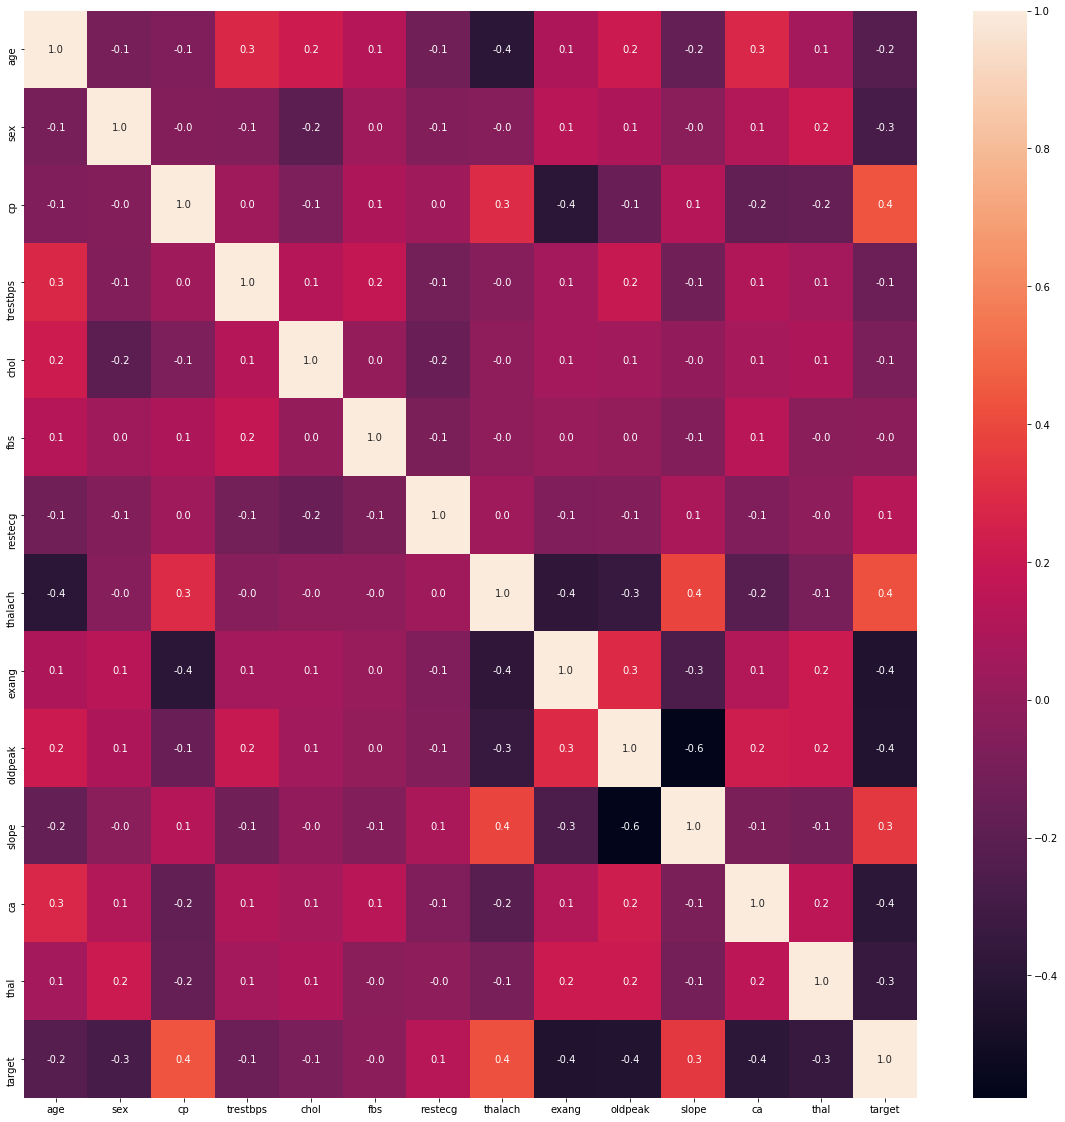

In [0]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

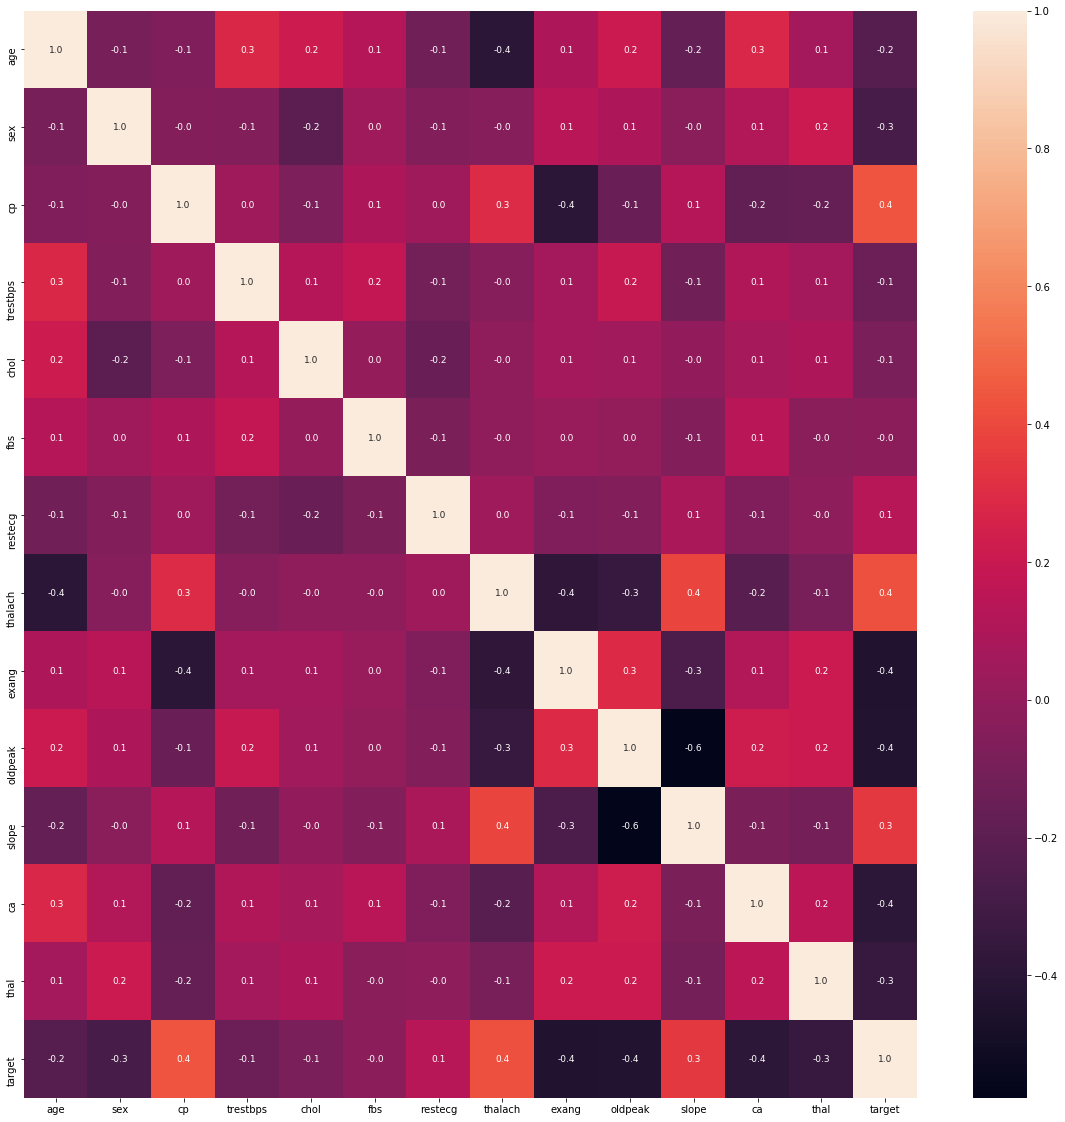

In [0]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":9},fmt='.1f')
plt.show()

Note, fmt = '' is necessary if you are using non-numeric labels, since the default value is fmt='.2g' which makes sense only for numeric values and would lead to an error for text labels.

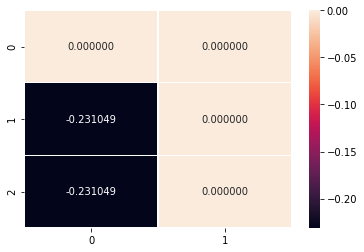

In [0]:
data = np.array([[0.000000,0.000000],[-0.231049,0.000000],[-0.231049,0.000000]])
axs = sns.heatmap(data, vmin=-0.231049, vmax=0, annot=True, fmt='f', linewidths=0.25)

Above: A manually created data array for reproducability

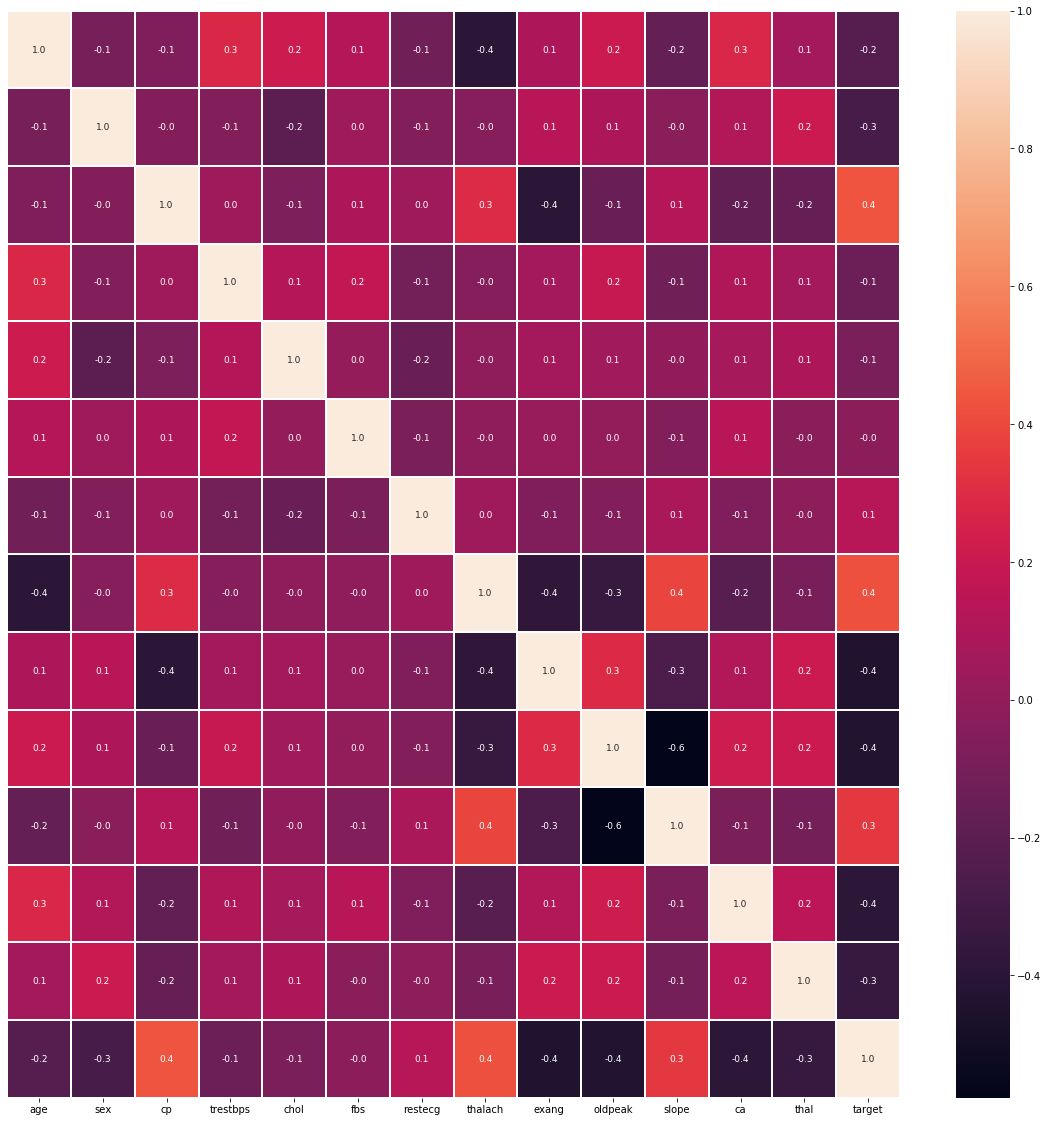

In [0]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.1f',annot_kws={"size":9},linewidths=1,linecolor='white',yticklabels=False)
plt.show()

Above: Adding line widths with white (and fiddling with the y labels)

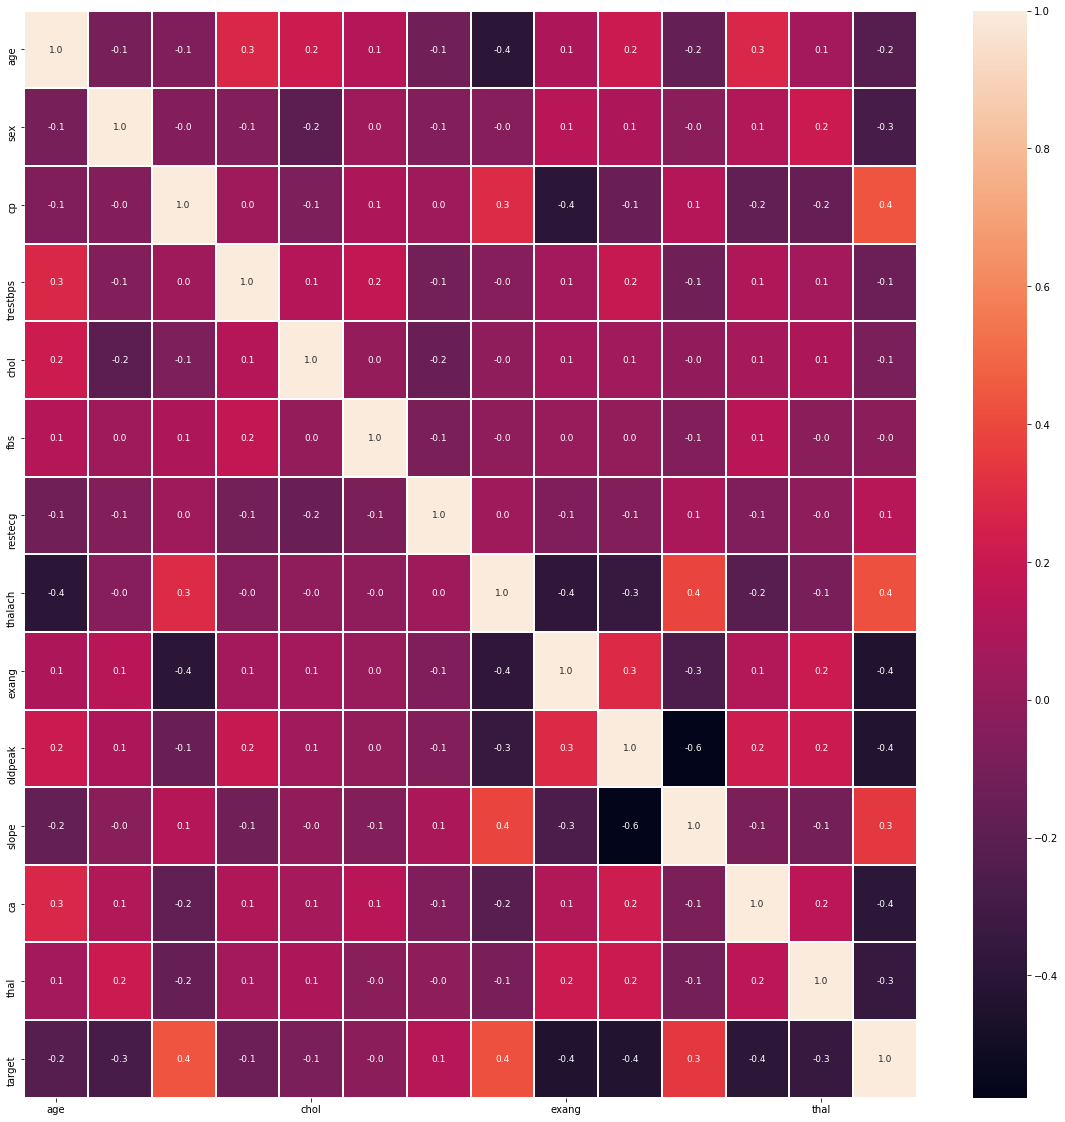

In [0]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.1f',annot_kws={"size":9},linewidths=1,linecolor='white',xticklabels=4)
plt.show()

Above: Now with the x labels (1 label in every 4 cells)

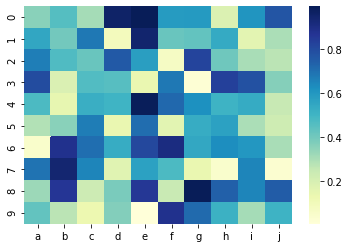

In [0]:
# Create a dataset (fake)
df1 = pd.DataFrame(np.random.random((10,10)), columns=["a","b","c","d","e","f","g","h","i","j"])
sns.heatmap(df1, cmap="YlGnBu")

Other choices: Blues, BuPu, Greens

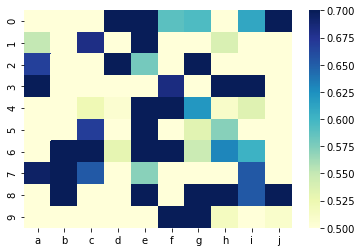

In [0]:
sns.heatmap(df1, cmap="YlGnBu",vmin=0.5,vmax=0.7)

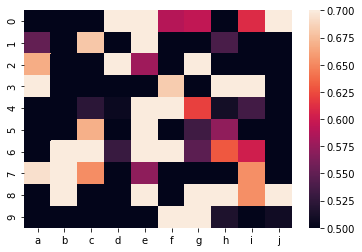

In [0]:
sns.heatmap(df1,vmin=0.5,vmax=0.7)

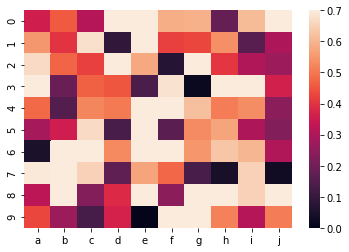

In [0]:
sns.heatmap(df1,vmin=0,vmax=0.7)

## Normalization on Heatmap
Sometimes, a normalization step is necessary to find out patterns in your heatmap. Check the left heatmap: an individual has higher values than others. Thus, he absorbs all the color variation: his column appears yellow and the rest of the heatmap appears green. To avoid this, you have to normalize the data frame. You can normalize on columns or on row.

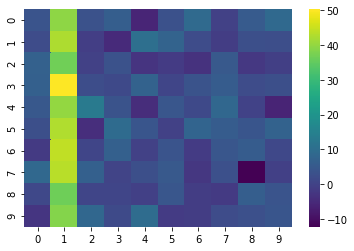

In [0]:
df2 = pd.DataFrame(np.random.randn(10,10) * 4 + 3)
df2[1]=df2[1]+40
 
# If we do a heatmap, we just observe that a column as higher values than others:
sns.heatmap(df2, cmap='viridis')

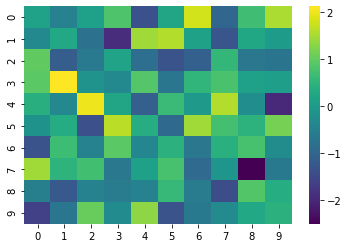

In [0]:
# Now if we normalize it by column:
df_norm_col=(df2-df2.mean())/df2.std()
sns.heatmap(df_norm_col, cmap='viridis')

Similiar for row as well:

Normalize it by row:

1: substract mean

df_norm_row=df.sub(df.mean(axis=1), axis=0)

2: divide by standard dev

df_norm_row=df_norm_row.div( df.std(axis=1), axis=0 )

In [0]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [0]:
df.age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

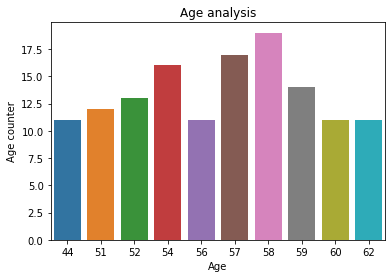

In [0]:
sns.barplot(x = df.age.value_counts()[:10].index, y = df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age counter')
plt.title('Age analysis')
plt.show()

In [0]:
df.target==0

0      False
1      False
2      False
3      False
4      False
       ...  
298     True
299     True
300     True
301     True
302     True
Name: target, Length: 303, dtype: bool

In [0]:
NoDisease = len(df[df.target==0])
HaveDisease = len(df[df.target==1])
print("Percentage of patients not having a heart disease: {:.2f}%".format((NoDisease/(len(df.target)))*100))
print("Percentage of patients having a heart disease: {:.2f}%".format((HaveDisease/(len(df.target)))*100))



Percentage of patients not having a heart disease: 45.54%
Percentage of patients having a heart disease: 54.46%


In [0]:
young_ages = df[(df.age>=29)&(df.age<40)]
middle_ages = df[(df.age>=40)&(df.age<55)]
elderly_ages = df[(df.age>=55)]
print("young ages", len(young_ages))
print("middle ages", len(middle_ages))
print("elderly ages", len(elderly_ages))

young ages 16
middle ages 128
elderly ages 159


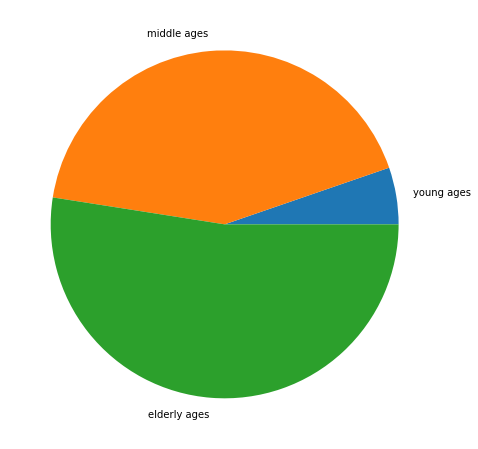

In [0]:
colors = ['blue','green', 'red']
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(young_ages), len(middle_ages), len(elderly_ages)], labels=['young ages', 'middle ages', 'elderly ages'])
plt.show()

You can also use countplot to compare how many 1's and 0's targets are there.

In [0]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [0]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/5, random_state = 0) 

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

If I had to apply feature scaling to the y (prediction) cell too, then we need to reshape the before applying. 

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(np.reshape(y_train, (-1,1)))

Note: Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are not affected by feature scaling.

## Applying linear regression

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print('Test accuracy {:.2f}%'.format(regressor.score(X_test,y_test)*100))

Test accuracy -131.30%


In [0]:
y_pred = regressor.predict(X_test)

In [0]:
print(y_pred)

[[-0.9498646 ]
 [ 0.35220015]
 [ 0.39229327]
 [-1.06022398]
 [-0.61260841]
 [-0.04392904]
 [-0.71851721]
 [-0.54727517]
 [-1.46454314]
 [-1.56439345]
 [ 0.22284578]
 [ 0.71832087]
 [-0.86902165]
 [ 0.44317579]
 [ 0.90852126]
 [ 0.16287566]
 [-0.73956247]
 [ 0.2209877 ]
 [-1.38234676]
 [ 0.43208561]
 [ 0.36367221]
 [-0.18019928]
 [-0.58328584]
 [-0.60233835]
 [ 0.52212589]
 [ 0.0812989 ]
 [-0.44685629]
 [-0.11594612]
 [ 1.04138563]
 [ 0.13185474]
 [ 0.16060034]
 [-1.20079583]
 [ 0.93014294]
 [ 0.23631518]
 [ 0.65078653]
 [ 0.06746986]
 [-0.94577318]
 [ 0.46996919]
 [-0.72155675]
 [-0.45240842]
 [ 0.25478228]
 [ 0.39333435]
 [-0.23138986]
 [-0.71031945]
 [-0.04362882]
 [ 0.21012763]
 [ 0.4191158 ]
 [ 0.10800714]
 [-0.806707  ]
 [ 0.39194909]
 [ 0.48446526]
 [ 0.05323923]
 [ 0.92508194]
 [ 0.46303273]
 [ 1.42833394]
 [-0.58996609]
 [ 0.78849639]
 [ 0.67458805]
 [ 0.30203081]
 [ 0.82986972]
 [ 0.35460598]]


In [0]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [0]:
y_pred1 = list(y_pred)
for i in range(len(y_pred1)):
    if y_pred1[i]<=0.5:
        y_pred1[i]=0
    else:
        y_pred1[i]=1
y_pred1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0]

In [0]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix (y_test, y_pred1)

print(confusionMatrix)

[[26  1]
 [24 10]]


In [0]:
print("Accuracy:",str(round((26+10)/(26+24+10+1)*100,2)), "%")

Accuracy: 59.02 %


So, looks like we need to switch to switch to logistic regression.

## Applying logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

In [0]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [0]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/5, random_state = 0) 

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 85.25%


In [0]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[21  6]
 [ 3 31]]


In [0]:
print("Accuracy:",str(round((21+31)/(21+6+31+3)*100,2)), "%")

Accuracy: 85.25 %
